In [136]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [137]:
import warnings
warnings.filterwarnings("ignore")

In [138]:
# Load data
df = pd.read_csv('../data/diabetes_012_health_indicators_BRFSS2015.csv')

# Dataset Information

In [139]:
# Preview of data
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [140]:
# Number of columns and samples
columns = len(df.columns)
samples = len(df)
print(f"No. of Columns: {columns}")
print(f"No. of Samples: {samples}")

No. of Columns: 22
No. of Samples: 253680


In [141]:
# Basic statistics of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [142]:
# Drop columns which are not related to the health indicators
df.drop(columns=["Education", "Income"], inplace=True)

# Dataset Visualisation

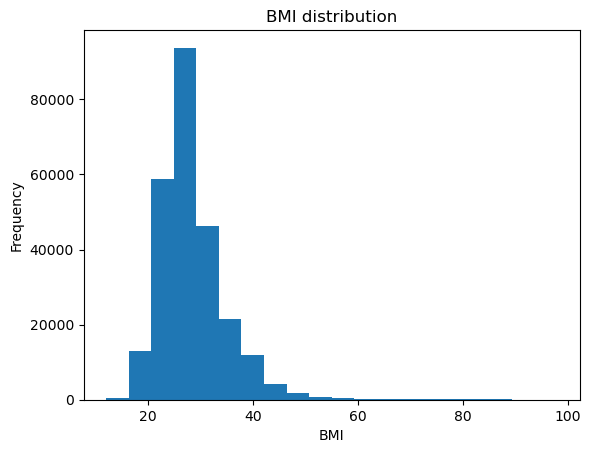

In [143]:
# BMI Distribution
plot = df["BMI"].hist(bins=20)
plot.set_title('BMI distribution')
plot.set_xlabel('BMI')
plot.set_ylabel('Frequency')
plot.grid(False)
plt.savefig("../visualisations/bmi_distribution.png")
plt.show()

In [144]:
# Find Null Values
df.isnull().sum()

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
dtype: int64

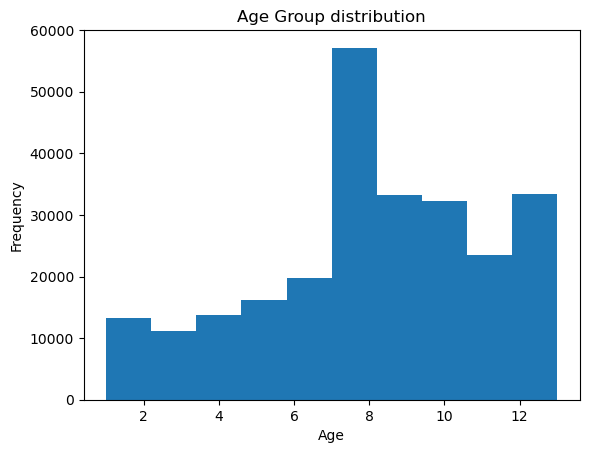

In [145]:
# Age Group Distribution
plot = df["Age"].hist()
plot.set_title('Age Group distribution')
plot.set_xlabel('Age')
plot.set_ylabel('Frequency')
plot.grid(False)
plt.savefig('../visualisations/age_group_distribution.png')
plt.show()

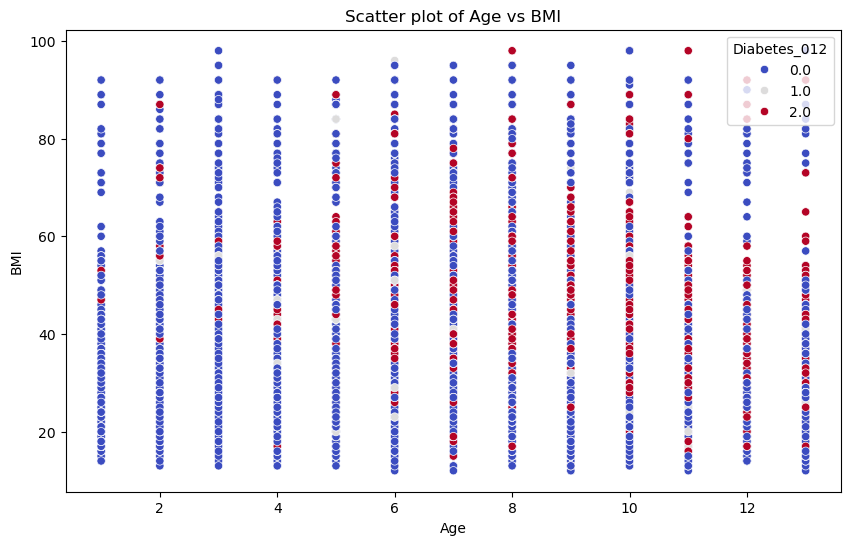

In [146]:
# Scatter plot for Age vs BMI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='BMI', hue='Diabetes_012', palette='coolwarm')
plt.title('Scatter plot of Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.savefig('../visualisations/age_bmi_scatterplot.png')
plt.show()

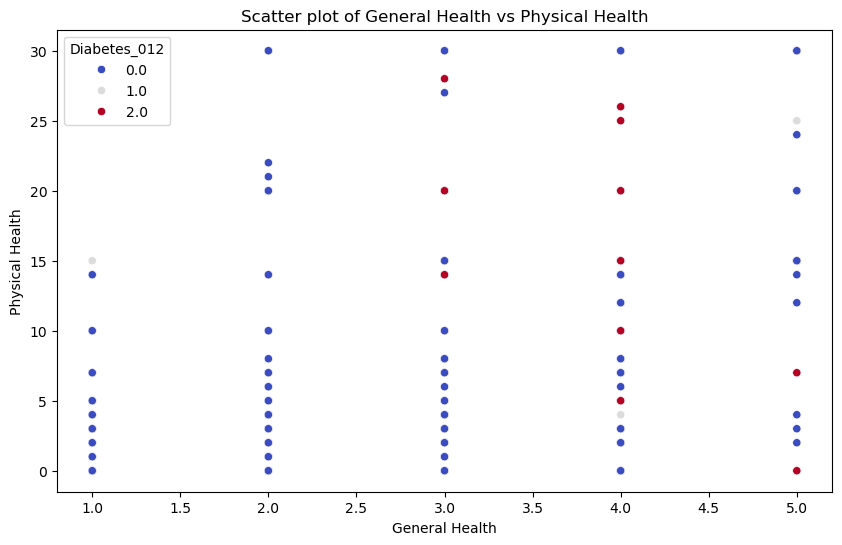

In [147]:
# Scatter plot for General Health vs Physical Health
plt.figure(figsize=(10, 6))

# Get top 1000 samples to avoid overplotting
sns.scatterplot(data=df.sample(1000), x='GenHlth', y='PhysHlth', hue='Diabetes_012', palette='coolwarm')

plt.title('Scatter plot of General Health vs Physical Health')
plt.xlabel('General Health')
plt.ylabel('Physical Health')
plt.savefig('../visualisations/genhealth_phyhealth_scatterplot.png')
plt.show()

In [148]:
# Find correlation data
corr = df.corr() 
corr

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age
Diabetes_012,1.000000,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,0.180272,-0.121947,-0.042192,-0.058972,-0.057882,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026
HighBP,0.271596,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.209361,-0.125267,-0.040555,-0.061266,-0.003972,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452
HighChol,0.209085,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.180765,-0.078046,-0.040859,-0.039874,-0.011543,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318
CholCheck,0.067546,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.044206,0.004190,0.023849,0.006121,-0.023730,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321
BMI,0.224379,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.052904,-0.147294,-0.087518,-0.062275,-0.048736,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618
Smoker,0.062914,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.114441,-0.087401,-0.077666,-0.030678,0.101619,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641
Stroke,0.107179,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.203002,-0.069151,-0.013389,-0.041124,-0.016950,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974
HeartDiseaseorAttack,0.180272,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,1.000000,-0.087299,-0.019790,-0.039167,-0.028991,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618
PhysActivity,-0.121947,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.087299,1.000000,0.142756,0.153150,0.012392,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511
Fruits,-0.042192,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.019790,0.142756,1.000000,0.254342,-0.035288,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547


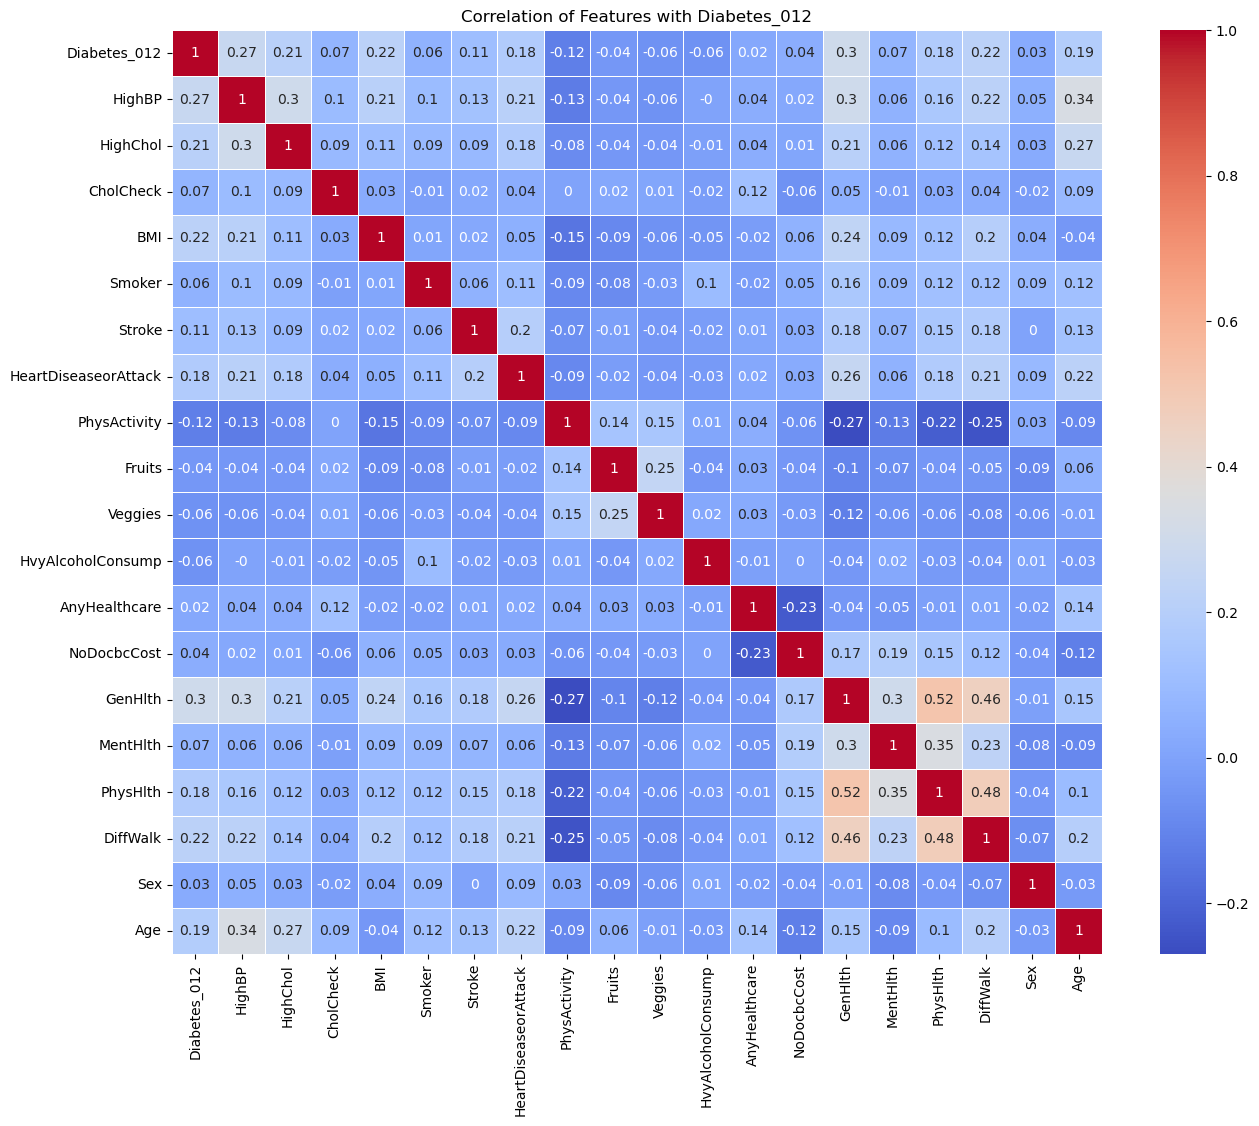

In [149]:
# Correlation Heatmap
plt.figure(figsize=(15, 12))
sns.heatmap(corr.map(lambda x: round(x, 2)), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Features with Diabetes_012')
plt.savefig('../visualisations/correlation_heatmap.png')
plt.show()

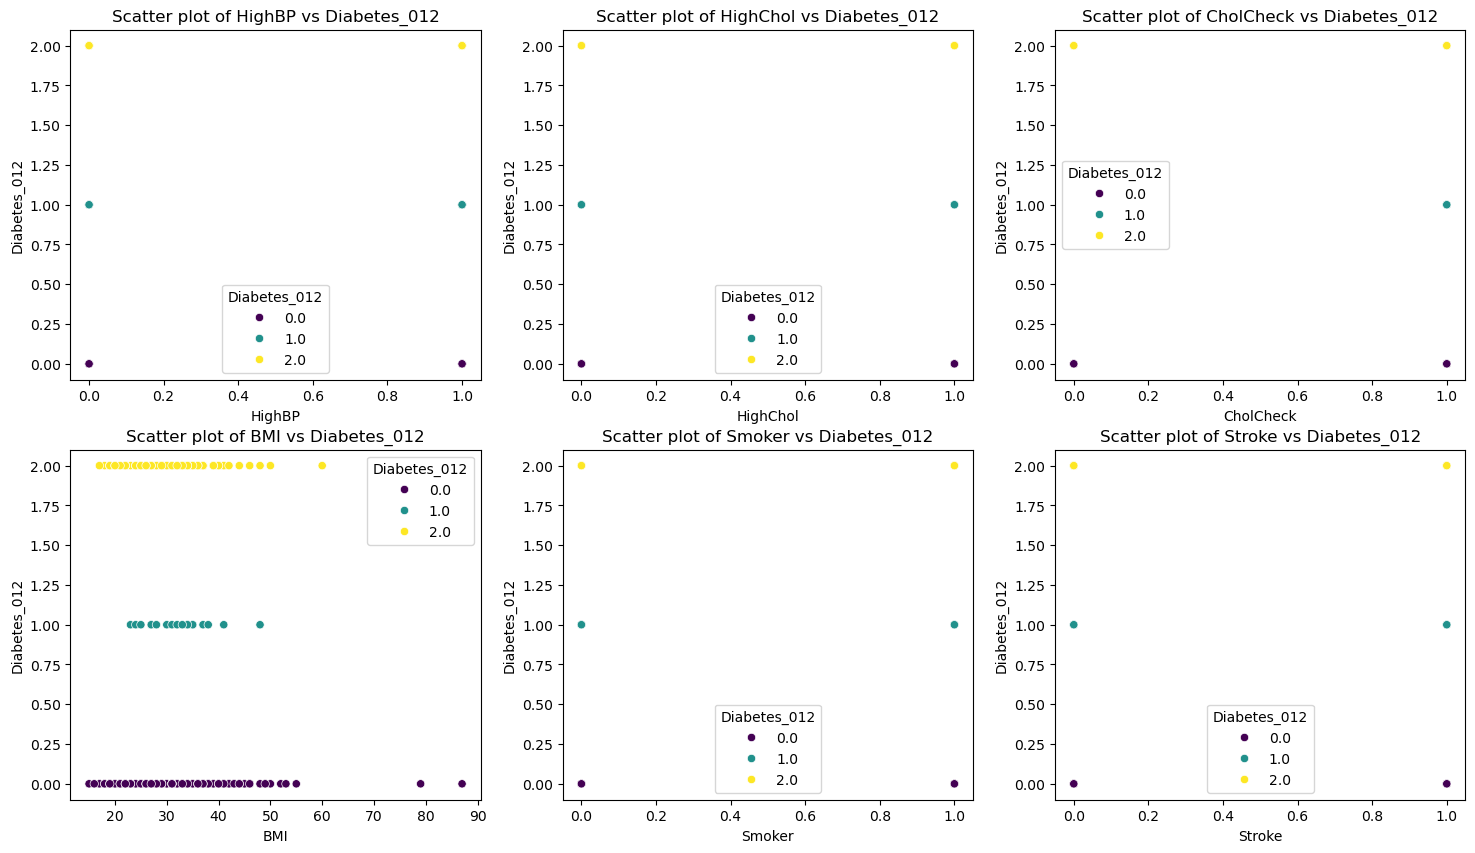

In [150]:
# Get the top 3 most correlated features with Diabetes_012
top_features = corr.drop(labels=["Diabetes_012"], axis=0).head(6).index

# Plot scatterplots for the top 6 features
plt.figure(figsize=(18, 10))

for i, feature in enumerate(top_features, 1):
    plt.subplot(2, 3, i)
    
    # Get top 1000 samples to avoid overplotting
    sns.scatterplot(data=df.sample(1000), x=feature, y='Diabetes_012', hue='Diabetes_012', palette='viridis')
    plt.title(f'Scatter plot of {feature} vs Diabetes_012')
    plt.xlabel(feature)
    plt.ylabel('Diabetes_012')

plt.savefig('../visualisations/top_features_scatterplots.png')
plt.show()

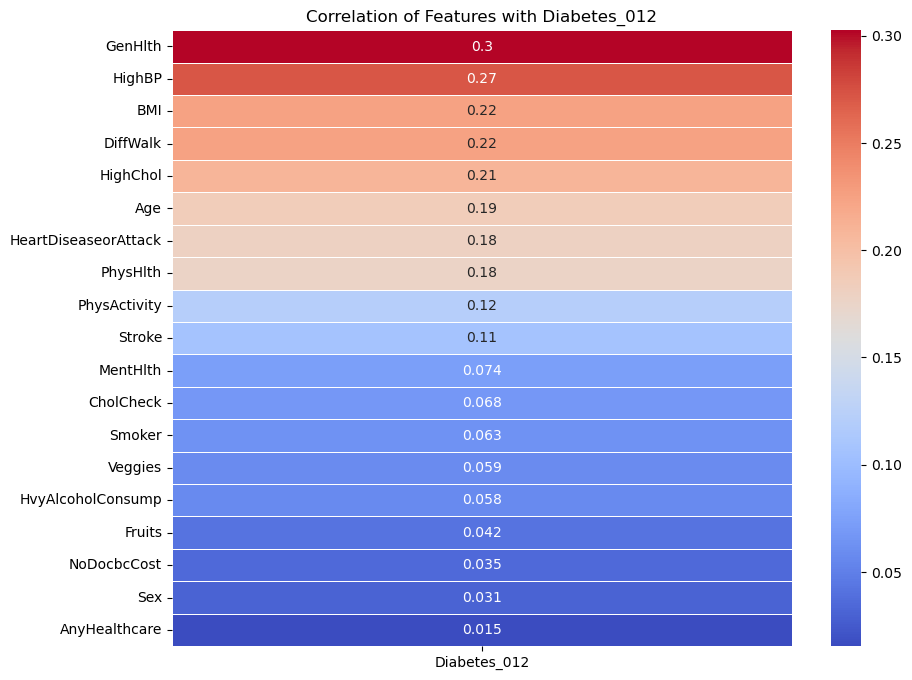

In [151]:
# Correlation of Features with Diabetes_012
clean_corr = corr[['Diabetes_012']].drop(labels=["Diabetes_012"], axis=0).map(lambda x: abs(x)).sort_values(by='Diabetes_012', ascending=False)

plt.figure(figsize=(10, 8))
sns.heatmap(clean_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation of Features with Diabetes_012')
plt.savefig('../visualisations/correlation_with_diabetes.png')
plt.show()

In [152]:
# Get most related columns
clean_df = corr[['Diabetes_012']].drop(labels=["Diabetes_012"], axis=0)
clean_df = clean_df[abs(clean_df["Diabetes_012"]) > 0.1]
related_columns = [*clean_df.index]
related_columns

['HighBP',
 'HighChol',
 'BMI',
 'Stroke',
 'HeartDiseaseorAttack',
 'PhysActivity',
 'GenHlth',
 'PhysHlth',
 'DiffWalk',
 'Age']

# Preprocessing

In [153]:
from sklearn.model_selection import train_test_split

# Load data
X = df.drop(columns=["Diabetes_012"])
y = df["Diabetes_012"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [154]:
# Load data from the most related columns
X_spec = df.drop(columns=["Diabetes_012", *[c for c in df.columns if c not in related_columns]])
y_spec = df["Diabetes_012"]

# Split data into training and testing sets
X_spec_train, X_spec_test, y_spec_train, y_spec_test = train_test_split(X, y, test_size=0.3)

# Model Training

In [155]:
import timeit
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Define a function to evaluate the model
def evaluate_model(model, X_test, y_test):
    metrics = {}
    y_pred = model.predict(X_test)

    # measure average time taken for prediction
    start_time = timeit.default_timer()
    model.predict(X_test)
    end_time = timeit.default_timer()
    avg_prediction_time = (end_time - start_time) / len(X_test)
    
    metrics["Average Prediction Time"] = avg_prediction_time
    
    # get accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # get precision
    precision = precision_score(y_test, y_pred, average='weighted')
    
    # get recall
    recall = recall_score(y_test, y_pred, average='weighted')
    
    # get f1 score
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=np.nan)
    
    # get confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # get classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    
    metrics["Accuracy"] = accuracy
    metrics["Precision"] = precision,
    metrics["Recall"] = recall,
    metrics["F1 Score"] = f1
    metrics["Confusion Matrix"] = cm
    metrics["Classification Report"] = report
    
    return metrics

In [156]:
# format metrics output as string
def format_metrics(metrics):
    result = ""

    for metric, value in metrics.items():
        result += f"{metric}: {'\n' if metric == 'Confusion Matrix' or metric == 'Classification Report' else ''} {value}"
        result += "\n"
        
    return result

In [157]:
from sklearn.utils.validation import check_is_fitted

# check if model has been fitted
def is_model_fitted(model):
    try:
        check_is_fitted(model)
        return True
    except:
        return False

In [158]:
# Define a function to train and evaluate the model
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    metrics = {}
    # measure training time
    start_time = timeit.default_timer()
    model.fit(X_train, y_train)
    end_time = timeit.default_timer()
    training_time = end_time - start_time

    metrics["Training Time"] = training_time
    
    if not is_model_fitted(model):
        model.fit(X_train, y_train)
    
    eval_metrics = evaluate_model(model, X_test, y_test)
    metrics.update(eval_metrics)
    result = format_metrics(metrics)
        
    return metrics, result

In [159]:
# plot confusion matrix
def plot_confusion_matrix(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='d', linewidths=0.5)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [160]:
import joblib

# save full model weights to disk
def save_model(model, filename=None):
    joblib.dump(model, filename)

## Logistic Regression

### Testing across all features

In [161]:
model_metrics = {}

In [162]:
from sklearn.linear_model import LogisticRegression

# Load Logistic Regression model
if not 'lr_model' in locals():
    lr_model = LogisticRegression(max_iter=1000)
    
metrics, results = train_and_evaluate_model(lr_model, X_train, y_train, X_test, y_test)
model_metrics["lr_full"] = metrics
print(results)

Training Time:  22.474925800001074
Average Prediction Time:  1.0054267843699851e-07
Accuracy:  0.8464732471354988
Precision:  (0.7995919163915434,)
Recall:  (0.8464732471354988,)
F1 Score:  0.8074562973803269
Confusion Matrix: 
 [[62598     0  1531]
 [ 1239     0   111]
 [ 8803     0  1822]]
Classification Report: 
 {'0.0': {'precision': 0.8617566079295155, 'recall': 0.9761262455363409, 'f1-score': 0.9153828718496151, 'support': 64129.0}, '1.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1350.0}, '2.0': {'precision': 0.5259815242494227, 'recall': 0.17148235294117647, 'f1-score': 0.258641493363617, 'support': 10625.0}, 'accuracy': 0.8464732471354988, 'macro avg': {'precision': 0.4625793773929794, 'recall': 0.3825361994925058, 'f1-score': 0.39134145507107737, 'support': 76104.0}, 'weighted avg': {'precision': 0.7995919163915434, 'recall': 0.8464732471354988, 'f1-score': 0.8074562973803269, 'support': 76104.0}}



In [163]:
save_model(lr_model, '../models/lr_full.joblib')

### Testing across features with correlation scores of >|0.1|

In [164]:
# Load Logistic Regression model
if not 'lr_spec_model' in locals():
    lr_spec_model = LogisticRegression(max_iter=1000)

metrics, results = train_and_evaluate_model(lr_spec_model, X_spec_train, y_spec_train, X_spec_test, y_spec_test)
model_metrics["lr_spec"] = metrics
print(results)

Training Time:  28.479272599999604
Average Prediction Time:  1.0340980763842193e-07
Accuracy:  0.8456060128245558
Precision:  (0.7969247056330764,)
Recall:  (0.8456060128245558,)
F1 Score:  0.807239439882047
Confusion Matrix: 
 [[62561     0  1659]
 [ 1278     0   125]
 [ 8688     0  1793]]
Classification Report: 
 {'0.0': {'precision': 0.8625891047471976, 'recall': 0.9741669261912177, 'f1-score': 0.9149889942740974, 'support': 64220.0}, '1.0': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1403.0}, '2.0': {'precision': 0.50125803746156, 'recall': 0.171071462646694, 'f1-score': 0.25508607198748046, 'support': 10481.0}, 'accuracy': 0.8456060128245558, 'macro avg': {'precision': 0.45461571406958584, 'recall': 0.3817461296126372, 'f1-score': 0.3900250220871926, 'support': 76104.0}, 'weighted avg': {'precision': 0.7969247056330764, 'recall': 0.8456060128245558, 'f1-score': 0.807239439882047, 'support': 76104.0}}



In [165]:
save_model(lr_spec_model, '../models/lr_spec.joblib')

## K-Nearest Neighbours

### Testing across all features

In [166]:
from sklearn.neighbors import KNeighborsClassifier

# Load K-Nearest Neighbors model
if not 'kn_model' in locals():
    kn_model = KNeighborsClassifier()

metrics, results = train_and_evaluate_model(kn_model, X_train, y_train, X_test, y_test)
model_metrics["kn_full"] = metrics
print(results)

Training Time:  0.03378489999886369
Average Prediction Time:  0.00033466497818775403
Accuracy:  0.8307579102281089
Precision:  (0.7842689843804729,)
Recall:  (0.8307579102281089,)
F1 Score:  0.8005368644836869
Confusion Matrix: 
 [[61118    39  2972]
 [ 1163     3   184]
 [ 8499    23  2103]]
Classification Report: 
 {'0.0': {'precision': 0.8634925120090421, 'recall': 0.9530477631024965, 'f1-score': 0.9060626051634806, 'support': 64129.0}, '1.0': {'precision': 0.046153846153846156, 'recall': 0.0022222222222222222, 'f1-score': 0.004240282685512367, 'support': 1350.0}, '2.0': {'precision': 0.39988590986879635, 'recall': 0.19792941176470588, 'f1-score': 0.26479476202467894, 'support': 10625.0}, 'accuracy': 0.8307579102281089, 'macro avg': {'precision': 0.4365107560105615, 'recall': 0.3843997990298082, 'f1-score': 0.39169921662455726, 'support': 76104.0}, 'weighted avg': {'precision': 0.7842689843804729, 'recall': 0.8307579102281089, 'f1-score': 0.8005368644836869, 'support': 76104.0}}



In [167]:
save_model(kn_model, '../models/kn_full.joblib')

### Testing across features with correlation scores of >|0.1|

In [168]:
# Load K-Nearest Neighbors model
if not 'kn_spec_model' in locals():
    kn_spec_model = KNeighborsClassifier()

metrics, results = train_and_evaluate_model(kn_spec_model, X_spec_train, y_spec_train, X_spec_test, y_spec_test)
model_metrics["kn_spec"] = metrics
print(results)

Training Time:  0.028308799999649636
Average Prediction Time:  0.00035028625565016206
Accuracy:  0.8319799222117102
Precision:  (0.7848283542366389,)
Recall:  (0.8319799222117102,)
F1 Score:  0.8016454619135036
Confusion Matrix: 
 [[61254    32  2934]
 [ 1211     2   190]
 [ 8386    34  2061]]
Classification Report: 
 {'0.0': {'precision': 0.8645467248168692, 'recall': 0.9538150109000312, 'f1-score': 0.9069896572913505, 'support': 64220.0}, '1.0': {'precision': 0.029411764705882353, 'recall': 0.0014255167498218105, 'f1-score': 0.002719238613188307, 'support': 1403.0}, '2.0': {'precision': 0.39749276759884283, 'recall': 0.19664154183761093, 'f1-score': 0.26311757947146686, 'support': 10481.0}, 'accuracy': 0.8319799222117102, 'macro avg': {'precision': 0.43048375237386477, 'recall': 0.3839606898291546, 'f1-score': 0.3909421584586686, 'support': 76104.0}, 'weighted avg': {'precision': 0.7848283542366389, 'recall': 0.8319799222117102, 'f1-score': 0.8016454619135036, 'support': 76104.0}}



In [169]:
save_model(kn_spec_model, '../models/kn_spec.joblib')

## Decision Tree Classifier

### Testing across all features

In [170]:
from sklearn.tree import DecisionTreeClassifier

# Load Decision Tree model
if not 'dt_model' in locals():
    dt_model = DecisionTreeClassifier()

metrics, results = train_and_evaluate_model(dt_model, X_train, y_train, X_test, y_test)
model_metrics["dt_full"] = metrics
print(results)

Training Time:  0.6953121000005922
Average Prediction Time:  3.097839798156413e-07
Accuracy:  0.7805371596762325
Precision:  (0.7797668191460871,)
Recall:  (0.7805371596762325,)
F1 Score:  0.7801305671156884
Confusion Matrix: 
 [[56236  1127  6766]
 [ 1011    34   305]
 [ 7092   401  3132]]
Classification Report: 
 {'0.0': {'precision': 0.8740577254853199, 'recall': 0.8769199582092345, 'f1-score': 0.8754865024753246, 'support': 64129.0}, '1.0': {'precision': 0.02176696542893726, 'recall': 0.025185185185185185, 'f1-score': 0.023351648351648352, 'support': 1350.0}, '2.0': {'precision': 0.3069685386650985, 'recall': 0.2947764705882353, 'f1-score': 0.3007489917418859, 'support': 10625.0}, 'accuracy': 0.7805371596762325, 'macro avg': {'precision': 0.40093107652645193, 'recall': 0.3989605379942183, 'f1-score': 0.3998623808562863, 'support': 76104.0}, 'weighted avg': {'precision': 0.7797668191460871, 'recall': 0.7805371596762325, 'f1-score': 0.7801305671156884, 'support': 76104.0}}



In [171]:
save_model(dt_model, '../models/dt_full.joblib')

### Testing across features with correlation scores of >|0.1|

In [172]:
# Load Decision Tree model
if not 'dt_spec_model' in locals():
    dt_spec_model = DecisionTreeClassifier()
    
metrics, results = train_and_evaluate_model(dt_spec_model, X_spec_train, y_spec_train, X_spec_test, y_spec_test)
model_metrics["dt_spec"] = metrics
print(results)

Training Time:  0.6857572999997501
Average Prediction Time:  3.13062388295776e-07
Accuracy:  0.7812467150215494
Precision:  (0.7822824345567307,)
Recall:  (0.7812467150215494,)
F1 Score:  0.7817627836456496
Confusion Matrix: 
 [[56202  1142  6876]
 [ 1034    42   327]
 [ 6913   356  3212]]
Classification Report: 
 {'0.0': {'precision': 0.876116541177571, 'recall': 0.8751479289940829, 'f1-score': 0.8756319672195, 'support': 64220.0}, '1.0': {'precision': 0.02727272727272727, 'recall': 0.02993585174625802, 'f1-score': 0.02854230377166157, 'support': 1403.0}, '2.0': {'precision': 0.3084013442150744, 'recall': 0.306459307318004, 'f1-score': 0.307427258805513, 'support': 10481.0}, 'accuracy': 0.7812467150215494, 'macro avg': {'precision': 0.4039302042217909, 'recall': 0.4038476960194483, 'f1-score': 0.4038671765988915, 'support': 76104.0}, 'weighted avg': {'precision': 0.7822824345567307, 'recall': 0.7812467150215494, 'f1-score': 0.7817627836456496, 'support': 76104.0}}



In [173]:
save_model(dt_spec_model, '../models/dt_spec.joblib')

## Random Forest Classifier

### Testing across all features

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Load Random Forest model
if not 'rf_model' in locals():
    rf_model = RandomForestClassifier()
    
metrics, results = train_and_evaluate_model(rf_model, X_train, y_train, X_test, y_test)
model_metrics["rf_full"] = metrics
print(results)

Training Time:  15.4002789999995
Average Prediction Time:  2.5060781299283985e-05
Accuracy:  0.8346079049721434
Precision:  (0.7923083619744,)
Recall:  (0.8346079049721434,)
F1 Score:  0.8064653604382359
Confusion Matrix: 
 [[61154   133  2842]
 [ 1180     7   163]
 [ 8233    36  2356]]
Classification Report: 
 {'0.0': {'precision': 0.8666090382189976, 'recall': 0.9536091315941306, 'f1-score': 0.9080299340737661, 'support': 64129.0}, '1.0': {'precision': 0.03977272727272727, 'recall': 0.005185185185185185, 'f1-score': 0.009174311926605505, 'support': 1350.0}, '2.0': {'precision': 0.4394702480880433, 'recall': 0.22174117647058825, 'f1-score': 0.2947579131740273, 'support': 10625.0}, 'accuracy': 0.8346079049721434, 'macro avg': {'precision': 0.44861733785992275, 'recall': 0.3935118310833014, 'f1-score': 0.40398738639146625, 'support': 76104.0}, 'weighted avg': {'precision': 0.7923083619744, 'recall': 0.8346079049721434, 'f1-score': 0.8064653604382359, 'support': 76104.0}}



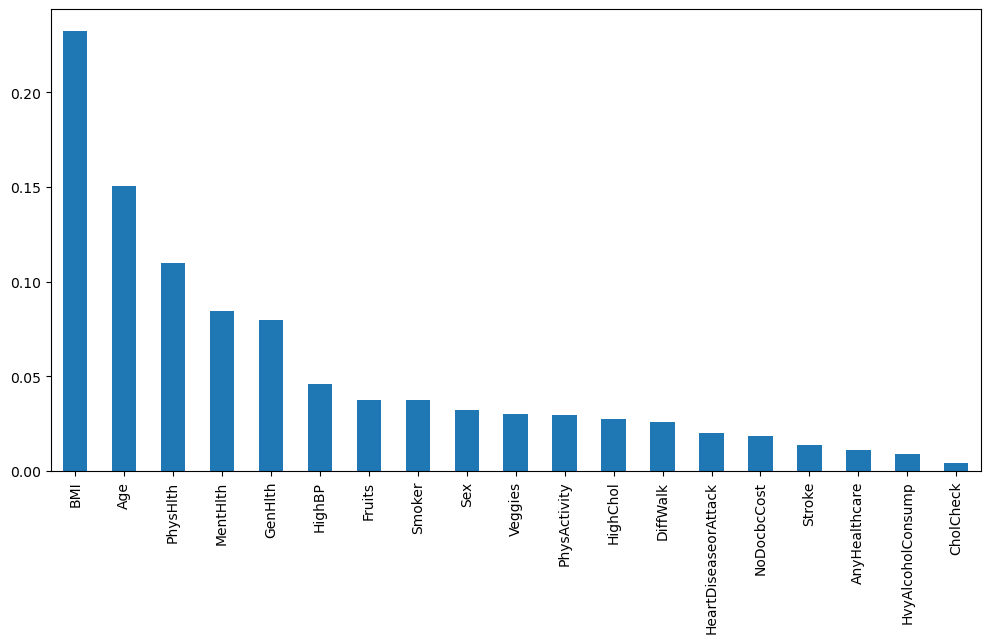

In [175]:
feature_importances = pd.Series(rf_model.feature_importances_, index=df.drop(columns=["Diabetes_012"]).columns)
feature_importances.sort_values(ascending=False).plot(kind="bar", figsize=(12, 6))
plt.savefig("../visualisations/rf_feature_importances.png")
plt.show()

### Testing across features with correlation scores of >|0.1|

In [176]:
# Load Decision Tree model
if not 'rf_spec_model' in locals():
    rf_spec_model = RandomForestClassifier()
    
metrics, results = train_and_evaluate_model(rf_spec_model, X_spec_train, y_spec_train, X_spec_test, y_spec_test)
model_metrics["rf_spec"] = metrics
print(results)

Training Time:  16.260938200000965
Average Prediction Time:  2.319669136970142e-05
Accuracy:  0.8356328182487123
Precision:  (0.7933684369814782,)
Recall:  (0.8356328182487123,)
F1 Score:  0.8081365948614728
Confusion Matrix: 
 [[61208   123  2889]
 [ 1213     4   186]
 [ 8064    34  2383]]
Classification Report: 
 {'0.0': {'precision': 0.8683833439738952, 'recall': 0.953098723139209, 'f1-score': 0.9087710181507739, 'support': 64220.0}, '1.0': {'precision': 0.024844720496894408, 'recall': 0.002851033499643621, 'f1-score': 0.005115089514066497, 'support': 1403.0}, '2.0': {'precision': 0.43660681568340054, 'recall': 0.22736380116401106, 'f1-score': 0.2990149946671686, 'support': 10481.0}, 'accuracy': 0.8356328182487123, 'macro avg': {'precision': 0.44327829338473007, 'recall': 0.3944378526009546, 'f1-score': 0.40430036744400294, 'support': 76104.0}, 'weighted avg': {'precision': 0.7933684369814782, 'recall': 0.8356328182487123, 'f1-score': 0.8081365948614728, 'support': 76104.0}}



In [177]:
import csv
import os

def save_metrics(metrics, directory_name):
    # Create directory if it doesn't exist
    if not os.path.exists(directory_name):
        os.makedirs(directory_name)
    
    # Save general metrics to CSV
    general_metrics_file = os.path.join(directory_name, 'general_metrics.csv')
    with open(general_metrics_file, mode='w+', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Metric", "Value"])
        for metric, value in metrics.items():
            if metric not in ["Confusion Matrix", "Classification Report"]:
                writer.writerow([metric, value])
    
    # Save confusion matrix to CSV
    confusion_matrix_file = os.path.join(directory_name, 'confusion_matrix.csv')
    with open(confusion_matrix_file, mode='w+', newline='') as file:
        writer = csv.writer(file)
        writer.writerow([""] + ["Predicted 0", "Predicted 1", "Predicted 2"])
        for i, row in enumerate(metrics["Confusion Matrix"]):
            writer.writerow([f"Actual {i}"] + list(row))
    
    # Save classification report to CSV
    classification_report_file = os.path.join(directory_name, 'classification_report.csv')
    with open(classification_report_file, mode='w+', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(["Class", "Precision", "Recall", "F1-Score", "Support"])
        for label, c_metrics in metrics["Classification Report"].items():
            if isinstance(c_metrics, dict):
                writer.writerow([label, c_metrics["precision"], c_metrics["recall"], c_metrics["f1-score"], c_metrics["support"]])

In [180]:
from tqdm import tqdm

# Save all metrics to CSV files
for model, metrics in tqdm(model_metrics.items()):
    # General model metrics
    metrics["Precision"] = metrics["Precision"][0]
    metrics["Recall"] = metrics["Recall"][0]
    model_metrics[model] = metrics
    save_metrics(metrics, f'../results/{model}')

100%|██████████| 8/8 [00:00<00:00, 557.86it/s]


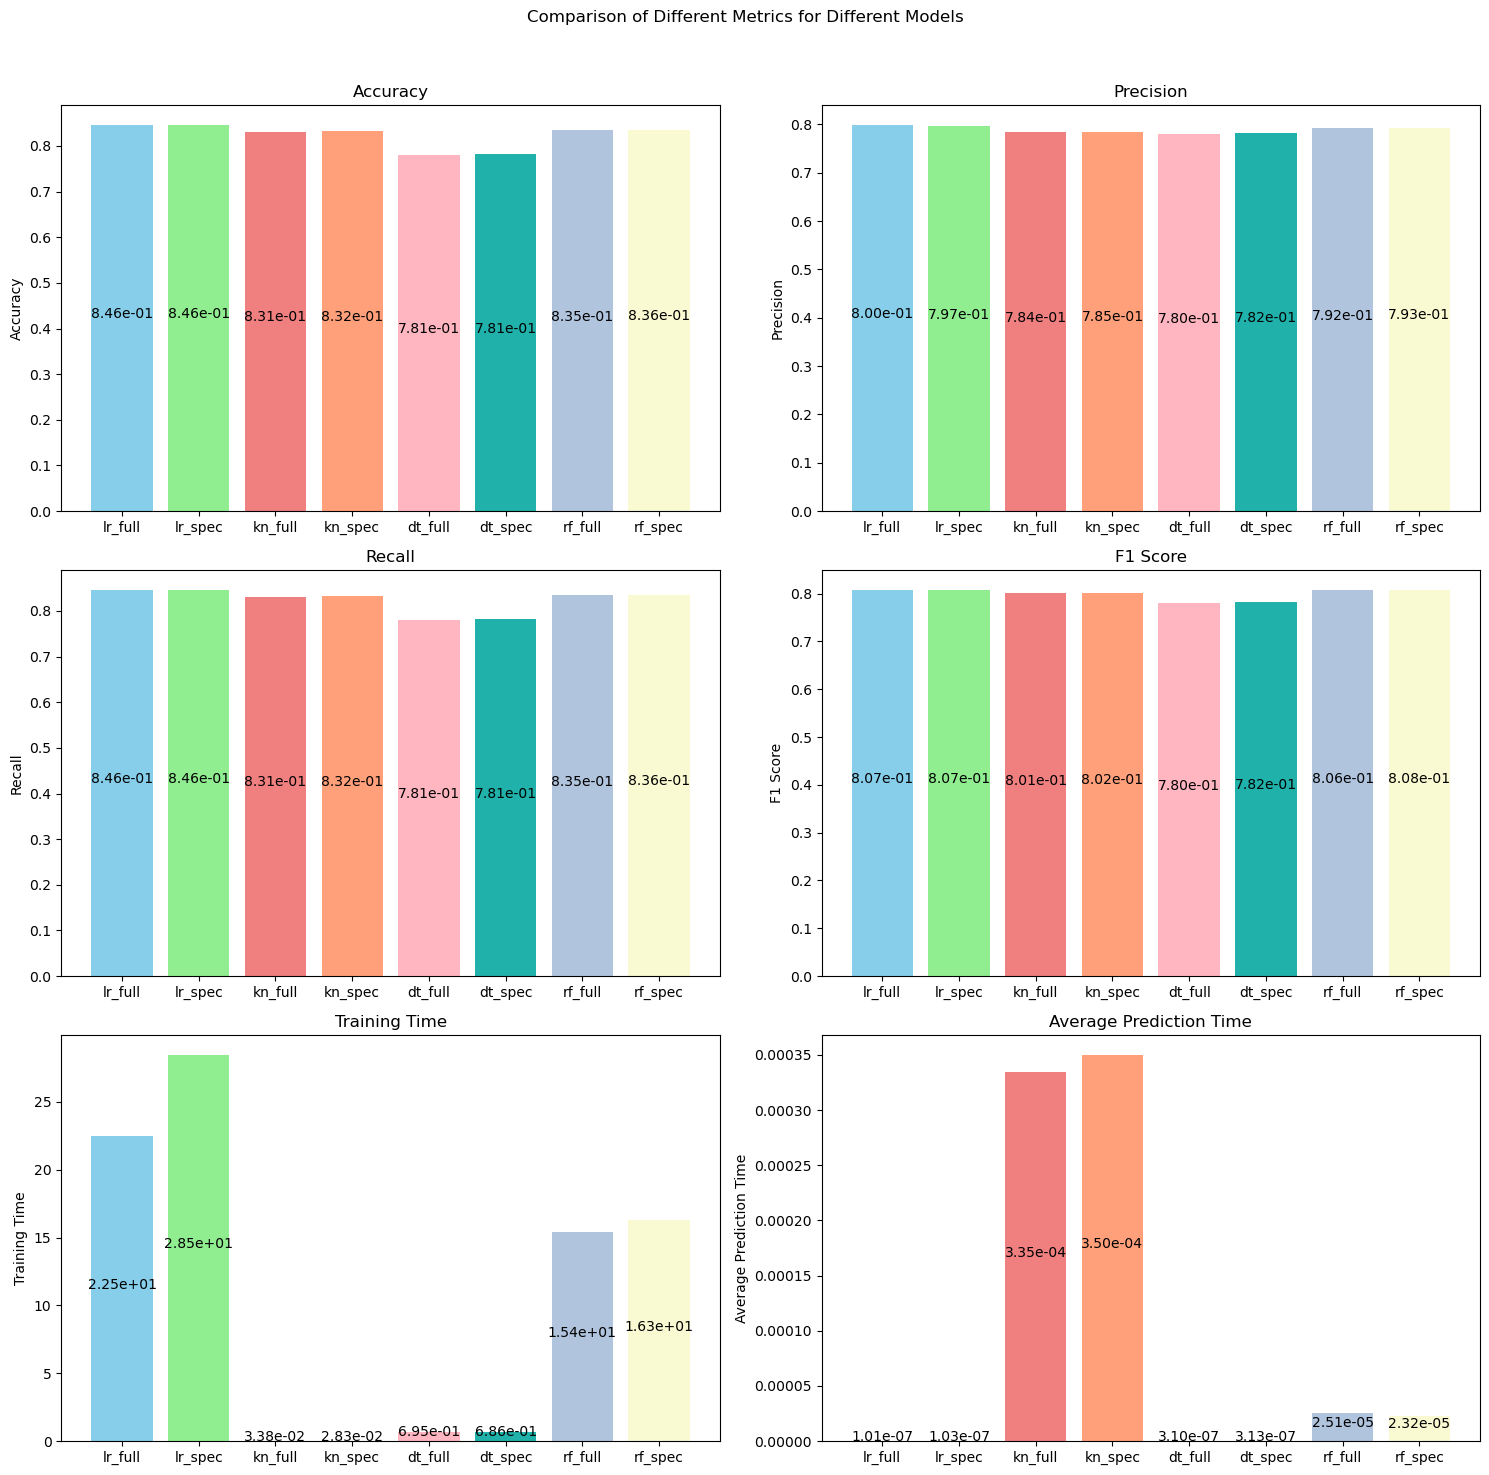

In [184]:
# Extract metrics from model_metrics
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Training Time', 'Average Prediction Time']

# Prepare data for plotting
metrics_data = {metric: {model: model_metrics[model][metric] for model in model_metrics} for metric in metrics_to_plot}

# Plot the metrics
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

for ax, metric in zip(axes.flatten(), metrics_to_plot):
    models = list(metrics_data[metric].keys())
    values = list(metrics_data[metric].values())
    
    # Plot the metric
    colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon', 'lightpink', 'lightseagreen', 'lightsteelblue', 'lightgoldenrodyellow']
    ax.bar(models, values, color=colors)
    ax.set_title(metric)
    ax.set_ylabel(metric)
    for i, v in enumerate(values):
        ax.text(i, v * 0.5, f"{v:.2e}", ha='center')

plt.suptitle('Comparison of Different Metrics for Different Models')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('../visualisations/metrics_comparison.png')
plt.show()
